In [ ]:
pip install sko

Best path     : [ 0  4  9  5  8  7 10  3  2  1  6 11]
Best distance : 3.17212764836696


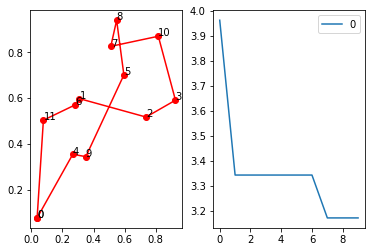

In [9]:
from __future__ import division
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP

#number of points/cities 
num_points = 12

# generate coordinate of points (coordinate of x and y)
points_coordinate = np.random.rand(num_points, 2)  
#calculate the distance matrix of the points
distance_matrix = spatial.distance.cdist(points_coordinate, 
                points_coordinate, metric='euclidean')

#[0,1,2,3,4,5,6,7,8,9,10,11] = total distance?
#[3,4,9,6,7,5..]
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], 
            routine[(i + 1) % num_points]] for i in range(num_points)])

def main():
    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=3, max_iter=10,
                  distance_matrix=distance_matrix)
    best_x, best_y = aca.run()
    print("Best path     :", best_x)
    print("Best distance :", best_y)
    # Plot the result
    fig, ax = plt.subplots(1, 2)
    best_points_ = np.concatenate([best_x, [best_x[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]
    for index in range(0, len(best_points_)):
        ax[0].annotate(best_points_[index], 
                       (best_points_coordinate[index, 0], 
                        best_points_coordinate[index, 1]))
    ax[0].plot(best_points_coordinate[:, 0], 
               best_points_coordinate[:, 1], 'o-r')
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
    plt.show()


if __name__ == "__main__":
    main()

## Question
1. What parameters you can modify in the function to get the best path?
2. What is the best parameters you can get?
3. What is the heuristic function in the code?

## Exercise
How do you modify the above code to include your own list of points instead of random points?
1. Use fixed points of 12 instead of random points, write to the code and run the code. Inspect the result.  
2. Run with different parameter values and inspect the result.
3. What is the best parameter values?